# PBH neutrino fluxes

Plot the neutrino flux for different PBH masses and abundances

In [1]:
from Source.flux_stuff import *
plt.rcParams['figure.figsize'] = [12, 8]


# Routine to plot fluxes for several masses and relevant backgrounds
def plot_fluxes(Mpbhs, fpbh, is_DM):
    if is_DM:
        sufix = "DM"
    else:
        sufix = "evaporated"

    fpbhs = fpbh*np.ones_like(Mpbhs)    # this is beta prime for evaporated PBHs

    compute_flux(Mpbhs, fpbhs, plot_fluxes = 1)

    # Load backgrounds
    backfolder = "data/backfluxes/"

    Eatm, atm_nue = np.loadtxt(backfolder+"atmnue_noosc_fluka_flux_norm.dat",unpack=True)
    Eatm, atm_nuebar = np.loadtxt(backfolder+"atmnuebar_noosc_fluka_flux_norm.dat",unpack=True)
    Eatm, atm_numu = np.loadtxt(backfolder+"atmnumu_noosc_fluka_flux_norm.dat",unpack=True)
    Eatm, atm_numubar = np.loadtxt(backfolder+"atmnumubar_noosc_fluka_flux_norm.dat",unpack=True)
    atmflux = atm_nue + atm_nuebar + atm_numu + atm_numubar
    EB8, sol_B8_1, sol_B8_2, sol_B8_3 = np.loadtxt(backfolder+"B8NeutrinoFlux.dat",unpack=True)
    sol_B8 = sol_B8_1 + sol_B8_2 + sol_B8_3
    Ehep, sol_hep = np.loadtxt(backfolder+"HEPNeutrinoFlux.dat",unpack=True)
    EO15, sol_O15 = np.loadtxt(backfolder+"O15NeutrinoFlux.dat",unpack=True)
    EN13, sol_N13 = np.loadtxt(backfolder+"N13NeutrinoFlux.dat",unpack=True)
    Epp, sol_pp = np.loadtxt(backfolder+"PPNeutrinoFlux.dat",unpack=True)

    # Interpolate backgrounds
    atmint = interp1d(Eatm, atmflux, fill_value=0., bounds_error=False)
    B8int = interp1d(EB8, sol_B8, fill_value=0., bounds_error=False)
    hepint = interp1d(Ehep, sol_hep, fill_value=0., bounds_error=False)
    O15int = interp1d(EO15, sol_O15, fill_value=0., bounds_error=False)
    N13int = interp1d(EN13, sol_N13, fill_value=0., bounds_error=False)
    ppint = interp1d(Epp, sol_pp, fill_value=0., bounds_error=False)

    Ebacks = np.logspace(np.log10(Epp[0]), np.log10(Eatm[-1]), 500)

    # Sum backgrounds and correct normalization, see table III of 1812.05550 or Table 2 of 1208.5723
    backmax = atmint(Ebacks) + B8int(Ebacks)*4.59e6 + hepint(Ebacks)*8.31e3 + O15int(Ebacks)*1.56e8 + N13int(Ebacks)*2.17e8 + ppint(Ebacks)*6.03e10

    # Plot backgrounds
    plt.fill_between( Ebacks, np.zeros_like(Ebacks), backmax, color = "b", alpha=0.3)

    # Label backgrounds
    plt.text(120., 2.e-3, "Atm.")
    plt.text(20., 1.e1, r"hep")
    plt.text(6., 5.e6, r"$^8$B")
    plt.text(1.7, 1.e7, r"$^{15}$O")

    # Create legend
    customlegend = []
    for n, Mpbh in enumerate(Mpbhs):
        if Mpbh<Mevap:
            fpbhlabel = r", $\beta'=$"
        else:
            fpbhlabel = r", $f_{\rm PBH}=$"
        customlegend.append( Line2D([0], [0], color=cols[n], lw=4, label = r"$M_{\rm PBH}=$"+scinot(Mpbh)+" g"))#+fpbhlabel+scinot(fpbhs[mm])))

    # Specify galactic or extragalactic if PBHs are DM
    if is_DM:

        customlegend.append( Line2D([0], [0], color="black", linestyle=":", label="Galactic"))
        customlegend.append( Line2D([0], [0], color="black", linestyle="--", label="Extragalactic"))
        customlegend.append( Line2D([0], [0], color="black", linestyle="-", label="Total"))

    customlegend.append( Line2D([0], [0], color="b", lw=6, linestyle="-", alpha=0.3, label="Backgrounds"))

    plt.xlim(1., 2.e2)
    plt.ylim( 1.e-5, 1.e8 )
    #plt.xlim(0.2, 1.e2)
    #plt.ylim( 1.e-2, 1.e4 )
    plt.legend(handles=customlegend, fontsize=10)#, loc="lower left")
    plt.xlabel('$E{\\rm \,\, [MeV]}$')
    if is_DM:
        plt.title(r"$f_{\rm PBH}=$"+scinot(fpbh))
    else:
        plt.title(r"$\beta'=$"+scinot(fpbh))
    plt.ylabel('$\Phi \,\, [{\\rm MeV}^{-1}{\\rm s}^{-1}{\\rm cm}^{-2}]$')
    plt.savefig("figures/fluxes_"+sufix+".pdf", bbox_inches='tight')
    plt.show()
    plt.gcf().clear()

## Compute neutrino fluxes from PBHs as Dark Matter

Mass: 1.0e+15 g
Mass: 2.0e+15 g
Mass: 4.0e+15 g


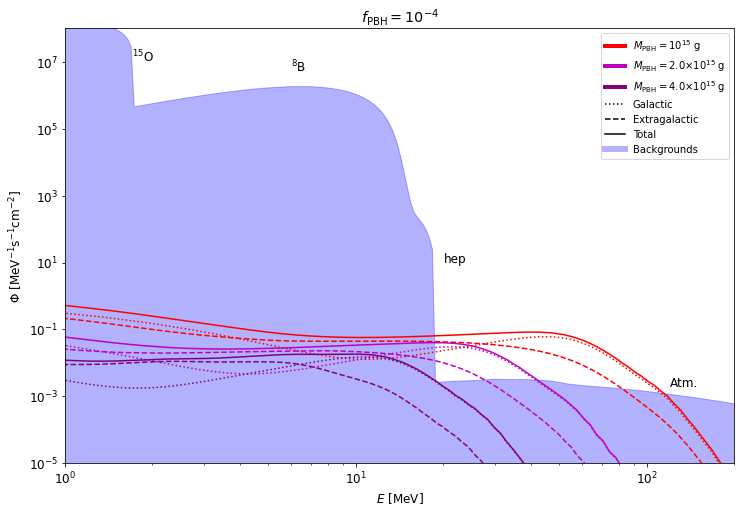

<Figure size 864x576 with 0 Axes>

In [2]:
#Mpbhs =  [1e15, 5e15]
Mpbhs =  [1e15, 2e15, 4e15]
fpbh = 1.e-4
plot_fluxes(Mpbhs, fpbh, is_DM = 1)

## Compute neutrino fluxes from evaporated PBHs

Mass: 1.0e+12 g
Mass: 1.0e+13 g
Mass: 1.0e+14 g


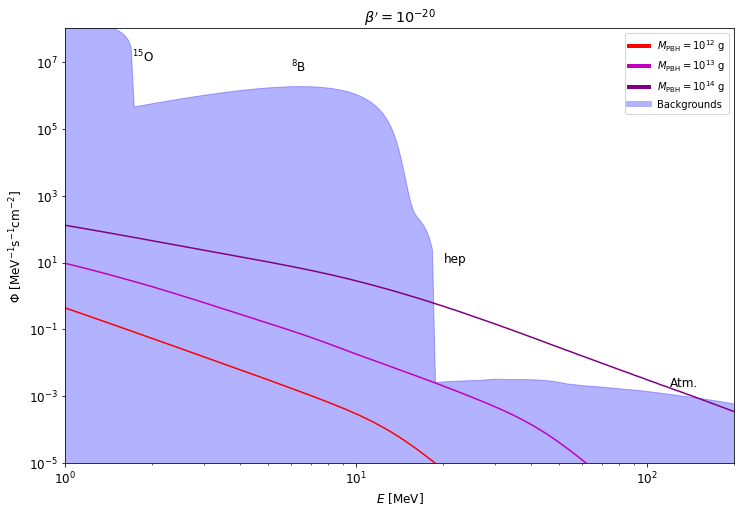

<Figure size 864x576 with 0 Axes>

In [3]:
Mpbhs = [1.e12, 1.e13, 1.e14]
fpbh = 1.e-20
plot_fluxes(Mpbhs, fpbh, is_DM = 0)